<a href="https://colab.research.google.com/github/alessiapapalini/MLPNS2021/blob/main/HM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

In [5]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
from scipy.optimize import curve_fit, minimize
    
%pylab inline
# this package sets up pretty plots
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


In [11]:
distributions = ['pois']

In [13]:
df = mymean

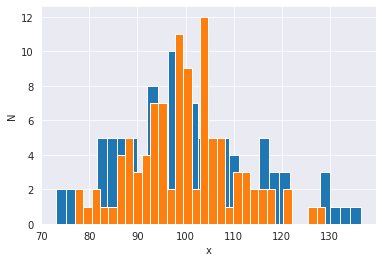

In [30]:
import numpy as np
np.random.seed(456) #per riprodurre sempre lo stesso valore
md = {}
md['pois'] = np.random.chisquare(df, size=100)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

md['pois'] = np.random.poisson(df, size=100)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

md['pois'] = np.random.chisquare(df, size=100)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


In [34]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Chisq mean: 99.73, standard deviation: 10.32


In [41]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


In [43]:
mysize

array([2000, 1000,  666,  500,  400,  333,  285,  250,  222,  200,  181,
        166,  153,  142,  133,  125,  117,  111,  105,  100,   95,   90,
         86,   83,   80,   76,   74,   71,   68,   66,   64,   62,   60,
         58,   57,   55,   54,   52,   51,   50,   48,   47,   46,   45,
         44,   43,   42,   41,   40,   40,   39,   38,   37,   37,   36,
         35,   35,   34,   33,   33,   32,   32,   31,   31,   30,   30,
         29,   29,   28,   28,   28,   27,   27,   27,   26,   26,   25,
         25,   25,   25,   24,   24,   24,   23,   23,   23,   22,   22,
         22,   22,   21,   21,   21,   21,   21,   20,   20,   20,   20])

Text(0, 0.5, 'size of the array')

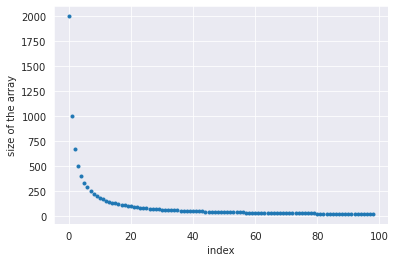

In [44]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

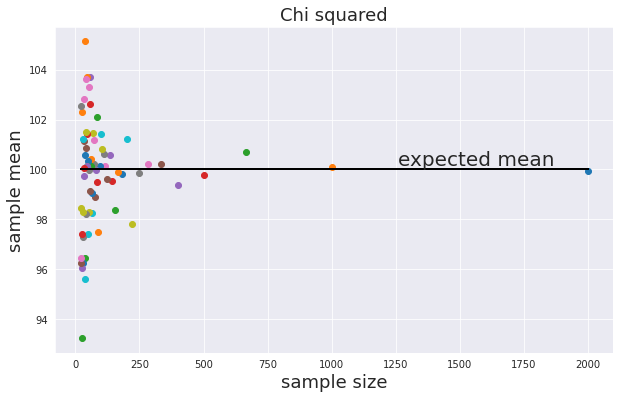

In [45]:
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)